<a href="https://colab.research.google.com/github/champ-rtu/CE888/blob/main/Offensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [103]:
#Open train_text file 
x = []
with open('train_text.txt', 'r', encoding='utf-8') as f:
  data = f.readlines()
  
  for row in data:
    x.append(row)

In [104]:
print(len(x))

11916


In [105]:
#Open train_label file 
y = []
with open('train_labels.txt', 'r', encoding='utf-8') as f:
  data = f.read().split('\n')

  for row in data:
    y.append(row)

In [106]:
print(len(y))

11917


In [107]:
#make both data to dataframe
data = pd.DataFrame(zip(x, y),  columns=['Comments', 'Labels'] )
data.head()

,Comments,Labels
0,@user Bono... who cares. Soon people will unde...,0
1,@user Eight years the republicans denied obama...,1
2,@user Get him some line help. He is gonna be j...,0
3,@user @user She is great. Hi Fiona! \n,0
4,@user She has become a parody unto herself? Sh...,1


In [108]:
data.shape

(11916, 2)

Label describesion

0.   not-offensive
1.   offensive




In [121]:
#Check number of each label(offensive and non-offensive)
data['Labels'].value_counts()

0    7975
1    3941
Name: Labels, dtype: int64

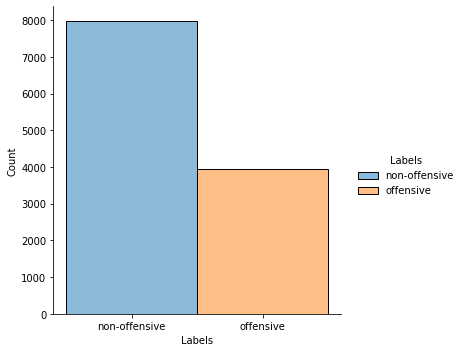

In [119]:
#Plot to identify number of offensive and non-offensive 
data['Labels'].value_counts()
df = data.copy()
df['Labels'] = df['Labels'].map({'0':'non-offensive', '1':'offensive'})
sns_plot = sns.displot(x=df['Labels'], data=df, hue='Labels')


In [120]:
from textblob import TextBlob

In [122]:
#create new 2 columns which is len and word counts
data['length'] = data['Comments'].apply(lambda x: len(x))
data['word_count'] = data['Comments'].apply(lambda x: len(x.split()))

In [123]:
data.head()

,Comments,Labels,length,word_count
0,@user Bono... who cares. Soon people will unde...,0,194,31
1,@user Eight years the republicans denied obama...,1,115,17
2,@user Get him some line help. He is gonna be j...,0,223,44
3,@user @user She is great. Hi Fiona! \n,0,37,7
4,@user She has become a parody unto herself? Sh...,1,190,32


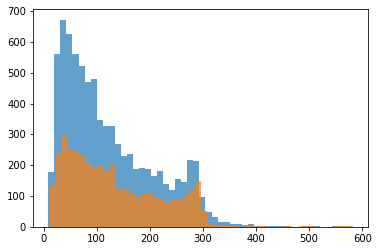

In [124]:
#Plot lenght with labels columns 
plt.hist(data[data['Labels'] == '0']['length'], bins = 50, alpha = 0.7)
plt.hist(data[data['Labels'] == '1']['length'], bins = 50, alpha = 0.7)
plt.show()

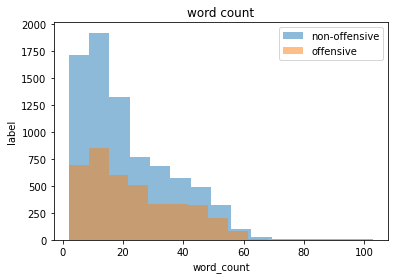

In [142]:
#Plot number of words with labels columns 
plt.hist(data[data['Labels'] == '0']['word_count'], bins = 15, alpha = 0.5, label='non-offensive')
plt.hist(data[data['Labels'] == '1']['word_count'], bins = 15, alpha = 0.5, label='offensive')
plt.title('word count')
plt.xlabel('word_count')
plt.ylabel('label')
plt.legend(loc="upper right")
plt.show()

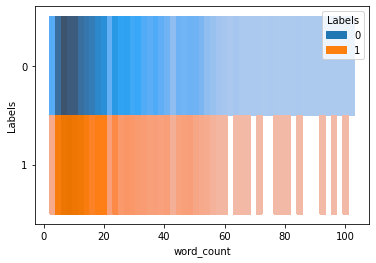

In [130]:
sns_plot = sns.histplot(x=data['word_count'],y=data['Labels'], data=data, hue='Labels')


###Preprocessing text data
1. convert text to lowercase
2. remove number and punctuation
3. tokenization
4. remove stopword
5. stem

In [60]:
#import library for preprocessing step
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

In [65]:
#create punctuation, stopword and stem 
punct = string.punctuation
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')
ps = PorterStemmer()

In [63]:
#Add "user " to stopwords
STOP_WORDS.add('user')

In [64]:
nlp.vocab['user'].is_stop

True

In [79]:
#Create fucction for preprocessing step
#the first function is remove punctuation, covert text to lower case
def preprocessing_1(text):
  txt = re.sub(r'\d+','', text)
  txt = txt.translate(str.maketrans("","",punct))
  txt = txt.lower()
  txt = txt.strip()
  return txt

#For the second function; tokenization and remove stopwords
def preprocessing_2(text):
  txt = word_tokenize(text)
  txt = [i for i in txt if not i in stopwords]
  txt = txt = " ".join(txt)
  return txt

#The last function; stemming
def stem(text):
  txt = word_tokenize(text)
  txt = [ps.stem(i) for i in txt ]
  txt = txt = " ".join(txt)
  return txt


In [67]:
data['Comments'] = data['Comments'].apply(lambda x: preprocessing_1(x))

In [68]:
data.head()

,Comments,Labels,length,word_count
0,user bono who cares soon people will understan...,0,194,31
1,user eight years the republicans denied obama’...,1,115,17
2,user get him some line help he is gonna be jus...,0,223,44
3,user user she is great hi fiona,0,37,7
4,user she has become a parody unto herself she ...,1,190,32


In [69]:
data['Comments'] = data['Comments'].apply(lambda x: preprocessing_2(x))

In [70]:
data.head()

,Comments,Labels,length,word_count
0,bono cares soon people understand gain followi...,0,194,31
1,years republicans denied obama ’ s picks breit...,1,115,17
2,line help gon na fine game went progressing re...,0,223,44
3,great hi fiona,0,37,7
4,parody unto certainly taken heat anwell idiot ...,1,190,32


In [71]:
#Create polarity column to check correlation between labels
data['polarity'] = data['Comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [72]:
data.head()

,Comments,Labels,length,word_count,polarity
0,bono cares soon people understand gain followi...,0,194,31,0.000000
1,years republicans denied obama ’ s picks breit...,1,115,17,-0.500000
2,line help gon na fine game went progressing re...,0,223,44,-0.074167
3,great hi fiona,0,37,7,0.800000
4,parody unto certainly taken heat anwell idiot ...,1,190,32,-0.292857


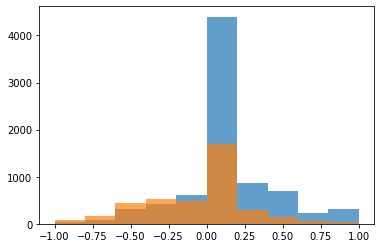

In [73]:
plt.hist(data[data['Labels'] == '0']['polarity'], bins =10, alpha = 0.7)
plt.hist(data[data['Labels'] == '1']['polarity'], bins = 10, alpha = 0.7)
plt.show()

In [74]:
from wordcloud import WordCloud

In [75]:
#seperate labels
df1 = data[data['Labels']=='0']
df2 = data[data['Labels']=='1']


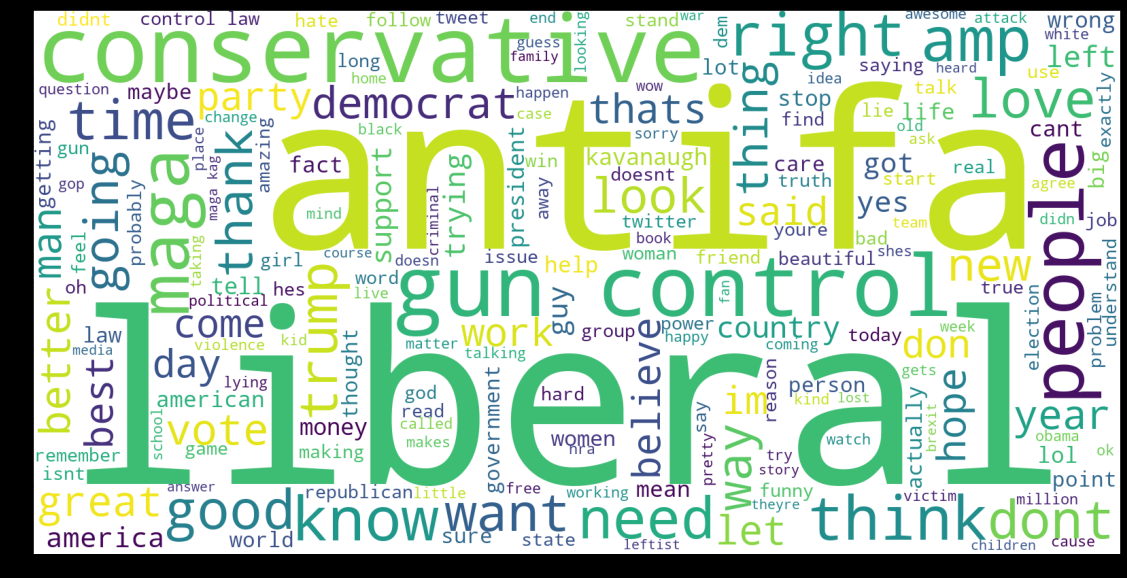

In [76]:
#Visualize the frequency words in non-offensive comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df1['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)


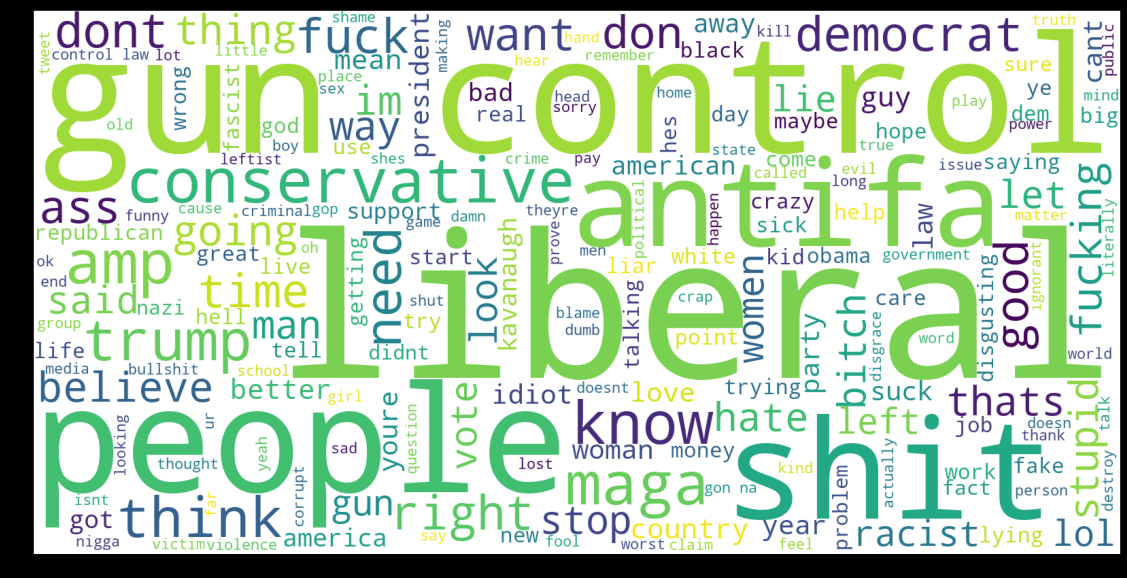

In [77]:
#Visualize the frequency words in offensive comments.
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df2['Comments'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [80]:
#apply stem function
data['Comments'] = data['Comments'].apply(lambda x: stem(x))
data.head()

,Comments,Labels,length,word_count,polarity
0,bono care soon peopl understand gain follow ph...,0,194,31,0.000000
1,year republican deni obama ’ s pick breitbart ...,1,115,17,-0.500000
2,line help gon na fine game went progress read ...,0,223,44,-0.074167
3,great hi fiona,0,37,7,0.800000
4,parodi unto certainli taken heat anwel idiot o...,1,190,32,-0.292857


###Modeling Section 

in this section 
we create pinline that includes TF-IDF and Random Forest classifier 


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [85]:
data.columns

Index(['Comments', 'Labels', 'length', 'word_count', 'polarity'], dtype='object')

In [86]:
y = data['Labels']
#x = data[['Comments', 'polarity']]
x = data['Comments']

In [87]:
#Split train and test dataset
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.3, random_state =0, shuffle = True)

In [90]:
#Create pipline
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [91]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score

In [94]:
#Evaluation by F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2437
           1       0.75      0.46      0.57      1138

    accuracy                           0.78      3575
   macro avg       0.77      0.69      0.71      3575
weighted avg       0.77      0.78      0.76      3575



Classify in test dataset

In [95]:
#Open test_text 
xt = []
with open('test_text.txt', 'r', encoding='utf-8') as f:
  data = f.readlines()
  
  for row in data:
    xt.append(row)

In [ ]:
len(xt)

860

In [96]:
#Open test_labe
yt = []
with open('test_labels.txt', 'r', encoding='utf-8') as f:
  data = f.read().split('\n')

  for row in data:
    yt.append(row)

In [ ]:
len(yt)

860

In [97]:
#Combine both together 
data_t = pd.DataFrame(zip(xt, yt),  columns=['Comments', 'Labels'] )
data_t.head()

,Comments,Labels
0,#ibelieveblaseyford is liar she is fat ugly li...,1
1,@user @user @user I got in a pretty deep debat...,0
2,"...if you want more shootings and more death, ...",0
3,Angels now have 6 runs. Five of them have come...,0
4,#Travel #Movies and Unix #Fortune combined Vi...,0


In [98]:
#Preprocessing in test file
data_t['Comments'] = data_t['Comments'].apply(lambda x: preprocessing_1(x))
data_t['Comments'] = data_t['Comments'].apply(lambda x: preprocessing_2(x))
data_t['Comments'] = data_t['Comments'].apply(lambda x: stem(x))

In [99]:
#Classified by Randomforest model
y_pred = classifier.predict(data_t['Comments'])

In [100]:
#Evaluation 
print(classification_report(data_t['Labels'], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       620
           1       0.81      0.47      0.60       240

    accuracy                           0.82       860
   macro avg       0.82      0.72      0.74       860
weighted avg       0.82      0.82      0.81       860

